#import necessary packages and downlaod data

In [1]:
%matplotlib inline
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
plt.style.use('ggplot')

#mnist
mnist = fetch_openml('mnist_784')
X, y = mnist["data"], mnist["target"]

X = X / 255

#MNIST
MNIST contains 70,000 images of hand-written digits, each 28 x 28 pixels, in greyscale with pixel-values from 0 to 255

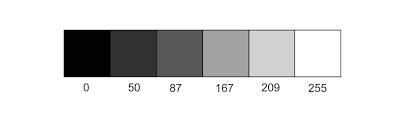

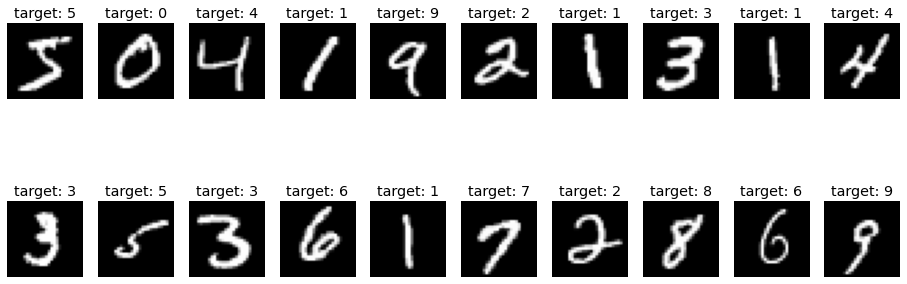

In [2]:
fig, axes = plt.subplots(2, 10, figsize=(16, 6))
for i in range(20):
    axes[i//10, i %10].imshow(X[i].reshape((28,28)), cmap='gray');
    axes[i//10, i %10].axis('off')
    axes[i//10, i %10].set_title(f"target: {y[i]}")

In [3]:
digits = 10
examples = y.shape[0]

y = y.reshape(1, examples)

Y_new = np.eye(digits)[y.astype('int32')]
Y_new = Y_new.T.reshape(digits, examples)

In [4]:
m = 60000
m_test = X.shape[0] - m

X_train, X_test = X[:m].T, X[m:].T
Y_train, Y_test = Y_new[:,:m], Y_new[:,m:]

shuffle_index = np.random.permutation(m)
X_train, Y_train = X_train[:, shuffle_index], Y_train[:, shuffle_index]
print(X_train.shape)
print(Y_train.shape)

(784, 60000)
(10, 60000)


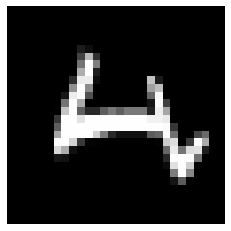

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

In [5]:
i = 12
plt.imshow(X_train[:,i].reshape(28,28), cmap = "gray")
plt.axis("off")
plt.show()
Y_train[:,i]

#Building NN

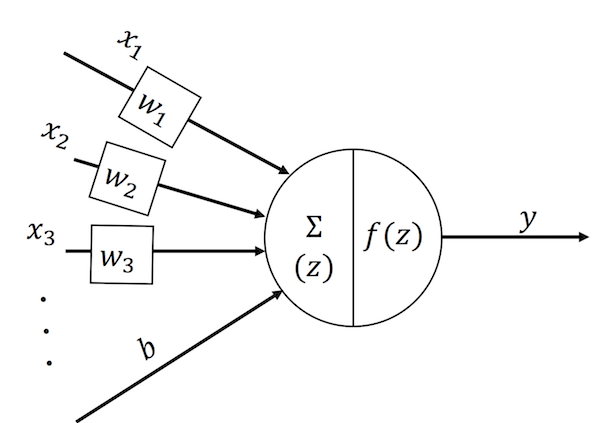

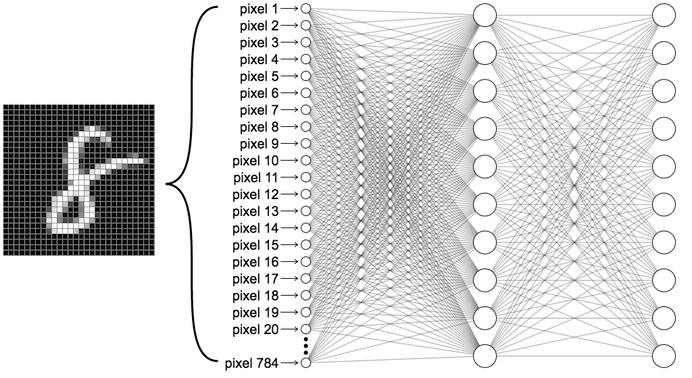

Activation

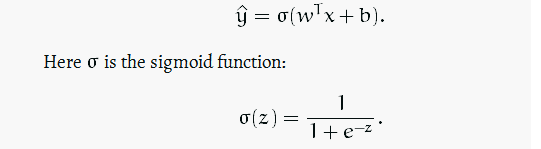

In [6]:
#activation sigmoid
def sigmoid(x):
  return 1. / (1.+np.exp(-x))

Loss

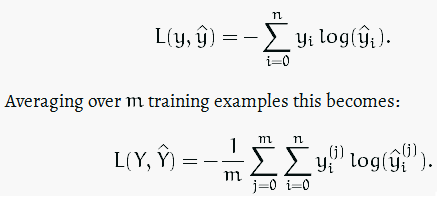

In [7]:
#cross-entropy for our cost function
def compute_multiclass_loss(Y, Y_hat):
    L_sum = np.sum(np.multiply(Y, np.log(Y_hat)))
    m = Y.shape[1]
    L = -(1/m) * L_sum
    return L

Backpropagation

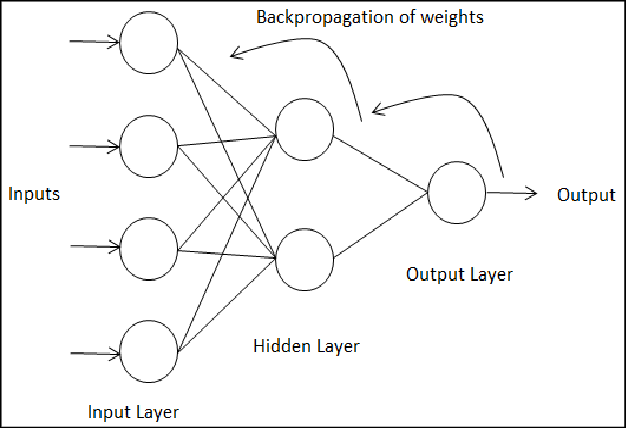

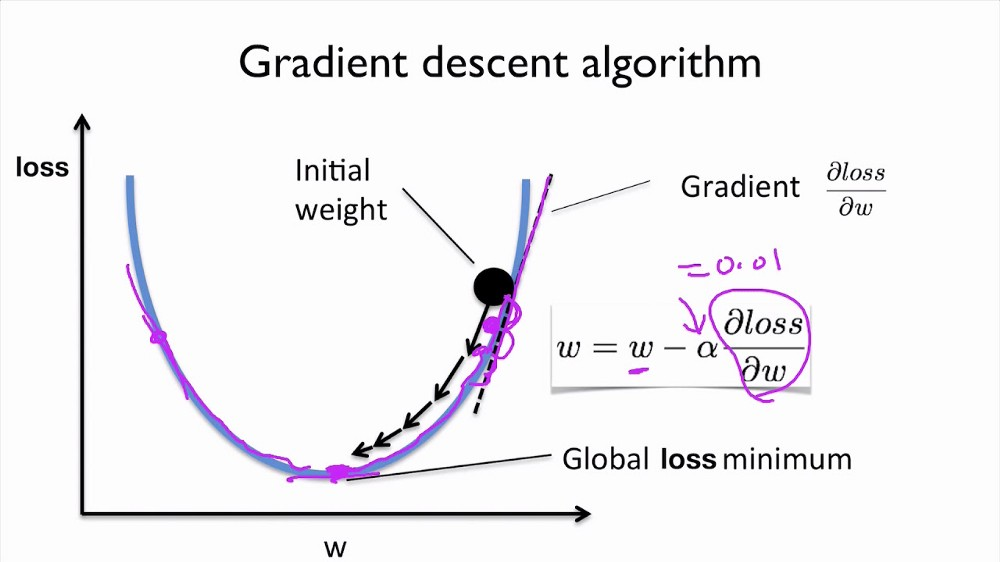

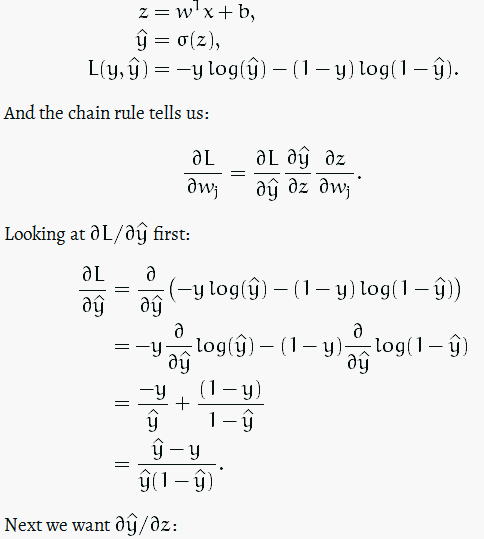
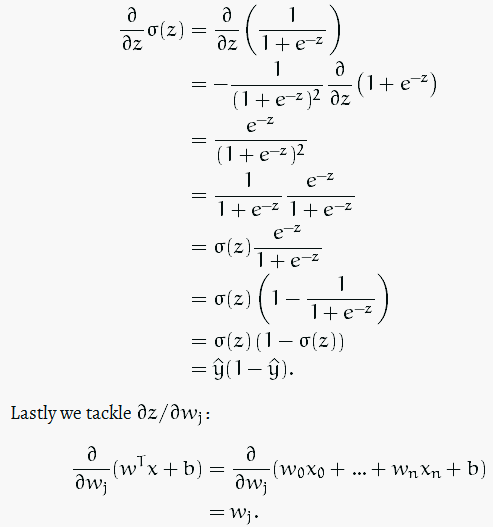
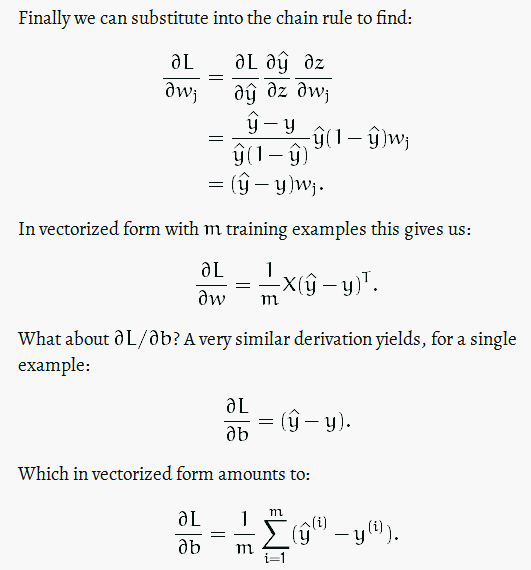

In [8]:
n_x = X_train.shape[0]
n_h = 64
digits = 10
learning_rate = 1
epochs = 2000

W1 = np.random.randn(n_h, n_x)
b1 = np.zeros((n_h, 1))
W2 = np.random.randn(digits, n_h)
b2 = np.zeros((digits, 1))

X = X_train
Y = Y_train

for i in range(epochs):
    Z1 = np.matmul(W1,X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.matmul(W2,A1) + b2
    A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)

    cost = compute_multiclass_loss(Y, A2)

    dZ2 = A2-Y
    dW2 = (1./m) * np.matmul(dZ2, A1.T)
    db2 = (1./m) * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.matmul(W2.T, dZ2)
    dZ1 = dA1 * sigmoid(Z1) * (1 - sigmoid(Z1))
    dW1 = (1./m) * np.matmul(dZ1, X.T)
    db1 = (1./m) * np.sum(dZ1, axis=1, keepdims=True)

    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1

    if (i % 100 == 0):
        print("Epoch", i, "cost: ", cost)

print("Final cost:", cost)

Epoch 0 cost:  5.606136743898548
Epoch 100 cost:  0.721570800392347
Epoch 200 cost:  0.5451107869816428
Epoch 300 cost:  0.4704805004566318
Epoch 400 cost:  0.4260681909204591
Epoch 500 cost:  0.39508438162656695
Epoch 600 cost:  0.3714267634320455
Epoch 700 cost:  0.35232682863147546
Epoch 800 cost:  0.3363652108521998
Epoch 900 cost:  0.32267914185959157
Epoch 1000 cost:  0.31069727652027623
Epoch 1100 cost:  0.30003351085766194
Epoch 1200 cost:  0.29041662520652356
Epoch 1300 cost:  0.28165190964066567
Epoch 1400 cost:  0.2736037517236302
Epoch 1500 cost:  0.26618119588285494
Epoch 1600 cost:  0.2593186239054537
Epoch 1700 cost:  0.2529604833602411
Epoch 1800 cost:  0.24705534304398835
Epoch 1900 cost:  0.24155456440436202
Final cost: 0.23646231739620235


In [9]:
Z1 = np.matmul(W1, X_test) + b1
A1 = sigmoid(Z1)
Z2 = np.matmul(W2, A1) + b2
A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)

predictions = np.argmax(A2, axis=0)
labels = np.argmax(Y_test, axis=0)

print(confusion_matrix(predictions, labels))
print(classification_report(predictions, labels))

[[ 941    0   12    1    3   11   11    4    9    5]
 [   0 1107    3    0    2    2    3    7    3    4]
 [   3    3  937   19    7    6   11   23   13    4]
 [   3    3   16  921    0   29    3    8   19    6]
 [   1    0   10    1  900    6    9    5   13   34]
 [  11    1    6   22    1  780   15    1   18   11]
 [  12    4   11    3    8    9  898    0   14    3]
 [   4    3   11   18    5   10    1  948   14   22]
 [   5   14   25   17   11   30    7    5  860   14]
 [   0    0    1    8   45    9    0   27   11  906]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       997
           1       0.98      0.98      0.98      1131
           2       0.91      0.91      0.91      1026
           3       0.91      0.91      0.91      1008
           4       0.92      0.92      0.92       979
           5       0.87      0.90      0.89       866
           6       0.94      0.93      0.94       962
           7       0.92      0.92   